# Creating training and test sets

We are now going to see how quickly we can code our own training and test sets with Python.

First, let's introduce the same packages and code to calculate our evaluation metrics quickly:

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae  
from math import sqrt
from sklearn.metrics import mean_squared_error as mse 

# The calculations we use for the evaluation calculations
from sklearn.metrics import mean_absolute_error as mae  
from math import sqrt
from sklearn.metrics import mean_squared_error as mse 

def calculate_evaluation_measures(x,y,a,b):
    y_hat = []
    for x_i in x: 
        y_hat.append(x_i*a+b)

    pe = []
    for j in range(0,len(y)):
        pe_j = (y[j]-y_hat[j])/y[j]*100
        pe.append(abs(pe_j))    
    mape = np.average(pe)

    print('Model MAE : ' + str(mae(y,y_hat)))
    print('Model RMSE : '+ str(sqrt(mse(y,y_hat))))
    print('Model MAPE : '+ str(mape))

## The data

Next, let's introduce the data we are going to be using:

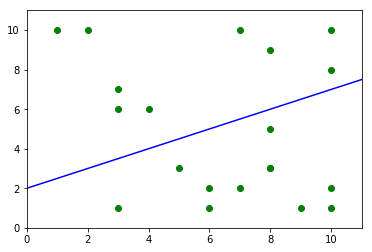

Model MAE : 3.6
Model RMSE : 4.018706259482023
Model MAPE : 151.79166666666669


In [2]:
# _o stands for 'original'
x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

# Make a scatter plot and overlay with our equations
plt.scatter(x_o,y_o,c='green')

# Fix the a and b parameters
a=0.5
b=2

# Set the axes limits
plt.axis([0, 11, 0, 11])
x = np.array(range(0,12))
plt.plot(x,x*a+b,'b-')
plt.show()

calculate_evaluation_measures(x_o,y_o,a,b)

## Obtaining the training and test sets

This code can now be used to obtain training and test sets:

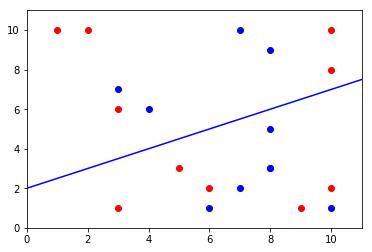

Evaluation 1: 
Model MAE : 3.85
Model RMSE : 4.407380174207803
Model MAPE : 147.91666666666669
Evaluation 2: 
Model MAE : 3.35
Model RMSE : 3.588175023601831
Model MAPE : 155.66666666666666


In [3]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x_o, y_o, test_size=0.5, random_state=42)

plt.scatter(x_train,y_train,c='red')
plt.scatter(x_test,y_test,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

print('Evaluation 1: ')
calculate_evaluation_measures(x_train,y_train,a,b)
print('Evaluation 2: ')
calculate_evaluation_measures(x_test,y_test,a,b)

The results give quite reasonable results. They are both quite comparable to the original figures we had for all three evaluation metrics.

You will use this function a lot throughout the remainder of the course.

By default, the function tries to keep the same proportion of each class that is present in the original dataset. Just notice this for a binary case:

In [4]:
x_o = np.array([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10])
y_o = np.array([5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2])

x_train, x_test, y_train, y_test = tts(x_o, y_o, test_size=0.5, random_state=42)

print('Labels training set: '+str(y_train))
print('Labels test set: '+str(y_test))

Labels training set: [2 5 5 2 5 2 5 2 2 5]
Labels test set: [5 2 2 5 5 5 2 5 2 2]
